In [15]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from astropy.io import fits
import pyregion
from os import path

pathDir='/Users/sunil/Documents/TestESO_137_002/ESO-137-002/'
from astropy.visualization import (ImageNormalize,LogStretch, ManualInterval)
f_xray = fits.open(path.join(pathDir,'08_drc_cosmicray/F475W_drc_chip_cleaned.fits'))
norm =ImageNormalize(f_xray[1].data, interval=ManualInterval(vmin=-0.0052, vmax=0.22), #zscale as in ds9
                      stretch=LogStretch(0.1))

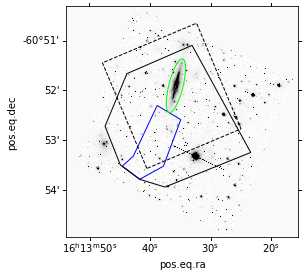

In [14]:
try:
    from astropy.wcs import WCS
    from astropy.visualization.wcsaxes import WCSAxes

    wcs = WCS(f_xray[1].header)
    fig = plt.figure()
    ax = WCSAxes(fig, [0.1, 0.1, 0.8, 0.8], wcs=wcs)
    fig.add_axes(ax)
except ImportError:
    ax = plt.subplot(111)

ax.imshow(f_xray[1].data, norm=norm,cmap=cm.gray_r,origin="lower")

reg_name = "test.reg"
r = pyregion.open(reg_name)

from pyregion.mpl_helper import properties_func_default

# select region shape with tag=="Group 1"
patch_list, artist_list = r.get_mpl_patches_texts()
for p in patch_list:
    ax.add_patch(p)
for t in artist_list:
    ax.add_artist(t)
    
plt.savefig('dd.eps', dpi=200)
plt.show()


In [ ]:
f_xray